# Tarefa 03

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os Tutores
- Divirta-se :)

In [1]:
import pandas as pd
import numpy as np
import requests

####  1) Lendo de APIs
Vimos em aula como carregar dados públicos do governo através de um API (*Application Programming Interface*). No exemplo de aula, baixamos os dados de pedidos de verificação de limites (PVL) realizados por estados, e selecionamos apenas aqueles referentes ao estado de São Paulo.

1. Repita os mesmos passos feitos em aula, mas selecione os PVLs realizados por municípios no estado do Rio de Janeiro.
2. Quais são os três *status* das solicitações mais frequentes na base? Quais são suas frequências?
3. Construa uma nova variável que contenha o ano do **status**. Observe que ```data_status``` vem como tipo *object* no **DataFrame**. Dica: você pode usar o método ```.str``` para transformar o tipo da variável em string, em seguida um método como [**slice()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) ou [**split()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).
4. Indique a frequência de cada ano do campo construído no item (3).

In [18]:
# 1) Seu código aqui
url = 'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf=RJ&tipo_interessado=Munic%C3%ADpio'
r = requests.get(url)
dados = r.json()
pd.DataFrame(dados['items'])

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,9223,Município,Duque de Caxias,3301702,RJ,None,Deferido,17944.000931/2007-35,2007-08-31T03:00:00Z,Operação contratual interna,Provias,Instituição Financeira Nacional,Banco do Brasil S/A,Real,1.980000e+06,0,0,10/09/2007
1,8889,Município,Engenheiro Paulo de Frontin,3301801,RJ,None,Arquivado,17944.000861/2008-04,2008-10-14T03:00:00Z,Operação contratual interna,Caminho da Escola 2,Instituição Financeira Nacional,Banco do Brasil S/A,Real,4.007000e+05,0,0,07/01/2009
2,5763,Município,Rio de Janeiro,3304557,RJ,None,Deferido,17944.000190/2013-31,2013-04-02T03:00:00Z,Operação contratual interna,PAC 2 - Mobilidade Grandes Cidades,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1.097000e+09,1,0,25/04/2013
3,6388,Município,Itaboraí,3301900,RJ,None,Regularizado,17944.000334/2012-78,2018-11-22T02:00:00Z,Operação contratual interna,Regularização de Dívida - Energia Elétrica,Empresa Não Estatal,Ampla Energia e Serviços S/A,Real,8.493818e+06,0,0,04/12/2018
4,39635,Município,Bom Jardim,3300506,RJ,PVL02.008305/2019-68,Deferido (PVL-IF),None,None,Operação contratual interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco do Brasil S/A,Real,4.350000e+05,0,1,29/05/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,42260,Município,Macuco,3302452,RJ,PVL02.009443/2019-64,Arquivado por decurso de prazo,17944.101534/2020-57,2020-03-19T21:07:52Z,Operação contratual interna (com garantia da U...,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1.500000e+06,0,0,01/10/2020
241,61672,Município,Casimiro de Abreu,3301306,RJ,PVL02.007467/2022-84,Deferido,17944.103810/2022-83,2022-09-21T16:55:44Z,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1.500000e+07,0,1,23/09/2022
242,34031,Município,Itatiaia,3302254,RJ,PVL02.003023/2019-74,Deferido (PVL-IF),None,None,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,5.000000e+06,0,1,17/10/2019
243,13589,Município,Rio de Janeiro,3304557,RJ,None,Arquivado,19405.000031/2006-30,2006-07-18T03:00:00Z,Operação contratual interna,Saneamento básico,Instituição Financeira Nacional,Caixa Econômica Federal,Real,4.681860e+05,0,0,26/06/2007


In [20]:
df_dados = pd.DataFrame(dados['items'])

In [21]:
# 2) Seu código aqui
df_dados.status.value_counts()

Deferido                                                 96
Arquivado                                                53
Regularizado                                             26
Arquivado por decurso de prazo                           24
Deferido (PVL-IF)                                        19
Encaminhado à PGFN com manifestação técnica favorável    13
Arquivado a pedido                                        6
Em retificação pelo interessado                           4
Em análise                                                2
Em retificação pelo credor                                1
Em retificação pelo interessado (PVL-IF)                  1
Name: status, dtype: int64

In [48]:
# 3) Seu código aqui
data_status = df_dados['data_status'].astype(str)
ano_status = data_status.str.slice(-4)
ano_status

0      2007
1      2009
2      2013
3      2018
4      2020
       ... 
240    2020
241    2022
242    2019
243    2007
244    2010
Name: data_status, Length: 245, dtype: object

2008    37
2007    29
2014    20
2010    19
2019    17
2013    15
2020    15
2023    14
2012    13
2022    11
2011    10
2009     9
2015     8
2021     5
2017     5
2002     4
2018     4
2016     4
2006     4
2003     1
2004     1
Name: data_status, dtype: int64

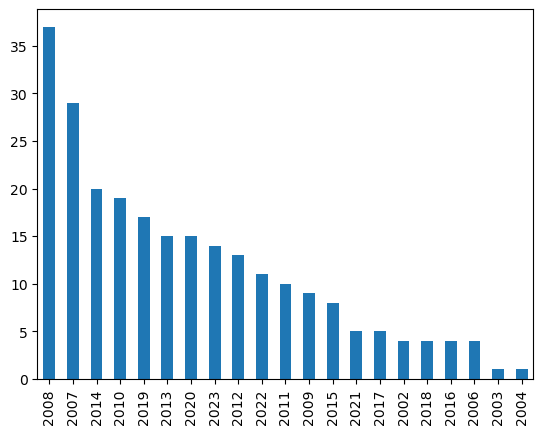

In [54]:
# 4)
ano_status.value_counts().plot(kind='bar')
ano_status.value_counts()

####  2) Melhorando a interação com o API
Observe dois URLs de consultas diferentes, por exemplo o URL utilizado em aula, e o URL feito no exercício anterior. Compare-os e observe as diferenças.

1. Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado (```'Estado'```ou ```Município```), e que devolve os dados da consulta no formato *DataFrame*.
2. Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com *status* em 'Arquivado por decurso de prazo' estão registradas?
3. Qual é o município da Bahia com mais solicitações deferidas?
4. Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'

In [2]:
#1) Seu código aqui
uf = 'BA'
interessado = 'Estado'

def consultar_api ( uf, interessado):
    if interessado == 'Município':
        interessado = 'Munic%C3%ADpio'
    url = f'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf={uf}&tipo_interessado={interessado}'
    return pd.DataFrame(requests.get(url).json()['items'])

In [3]:
# 2) Seu código aqui
consultar_api('MG', 'Estado').status.value_counts()

Encaminhado à PGFN com manifestação técnica favorável    20
Deferido                                                  7
Arquivado a pedido                                        5
Arquivado                                                 3
Arquivado pela STN                                        3
Arquivado por decurso de prazo                            1
Indeferido                                                1
Name: status, dtype: int64

In [9]:
df = consultar_api('BA', 'Município')

In [20]:
# 3) Seu código aqui
deferidos = df[df['status'] == 'Deferido']

In [24]:
deferidos['interessado'].value_counts()

Luís Eduardo Magalhães    15
Vitória da Conquista      11
Camaçari                  10
Lauro de Freitas          10
Barreiras                 10
                          ..
Ituberá                    1
Ribeirão do Largo          1
Encruzilhada               1
Ibicuí                     1
São Felipe                 1
Name: interessado, Length: 181, dtype: int64

In [74]:
# 4) Seu código aqui
consultar_api('BA', 'Estado').to_csv('Dados_solicitações_Bahia.csv')